In [977]:
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime as  dt
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
from matplotlib import style
import requests
style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

In [978]:
#Stocks considered Apple and Mindtree
a1 = yf.Ticker("AAPL")
dfa = a1.history(start='2013-01-01', end='2018-12-31' , interval = '1d')

a2 = yf.Ticker("MINDTREE.NS")
dfm = a2.history(start='2013-01-01', end='2018-12-31' , interval = '1d')

#Alternate between dfm and dfa to get results for selected stocks
df = dfa 

In [979]:
data = df
position=0
position_index=0
target= 40
stoploss= 1
realised_pnl=0
number_of_trades=0
pnl_l = 0
pnl_h = 0
pnl_l1 = []
position_l = []
position_2 = []
tradebook = {}

In [980]:
#BB Bands Function
def BB(df1, pv=0):
    df1['upper_band'], df1['middle_band'], df1['lower_band'] = ta.BBANDS(df1['Close'], timeperiod =20)
    if pv==1:
        plt.plot(df1['Close'], color = 'blue')
        plt.plot(df1['upper_band'], color = 'red')
        plt.plot(df1['lower_band'] , color = 'green')
        plt.show

In [981]:
#MACD Function
def MACD(df1, pv=0):
    df1['macd'], df1['macdsignal'], df1['macdhist'] = ta.MACD(df1['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    if pv==1:
        plt.plot(df1['macd'], color = 'black')
        plt.plot(df1['macdsignal'], color = 'red')
        plt.show

In [982]:
#RSI Function
def RSI(df1, pv=0):
    df1['RSI'] = ta.RSI(df1['Close'], timeperiod=14)
    if pv==1:
        plt.plot(df1['RSI'], color = 'purple')
        plt.show

In [983]:
BB(data)
MACD(data)
RSI(data)

In [984]:
for col in data.columns:
    print(col)

Open
High
Low
Close
Volume
Dividends
Stock Splits
upper_band
middle_band
lower_band
macd
macdsignal
macdhist
RSI


In [985]:
#STRATEGY MACD, BB Bands and RSI
for i in range(1,(len(data)-1)):

    if ((position == 0)):
         if(#((data['macd'][data.index[i]] > data['macdsignal'][data.index[i]]) and 
            #(data['macd'][data.index[i-1]] < data['macdsignal'][data.index[i-1]])) 
            #or
            ((data['Close'][data.index[i]] < data['lower_band'][data.index[i]]) and 
            (data['Close'][data.index[i-1]] > data['lower_band'][data.index[i-1]]))
            #or
            #((data['RSI'][data.index[i]] < 30) and 
            #(data['RSI'][data.index[i-1]] > 30))
           ):
                position_time=data.index[i]
                position_index=data.index[i]
                entry_price = data.loc[data.index[i+1],'Open']
                position = 1
                print('long position at {}'.format(data.index[i]))
                number_of_trades=number_of_trades+1
                position_l.append(position_index)
                continue

    if (position_index!=0):
         pnl = ((data.loc[data.index[i],'Close']- entry_price)/entry_price)*(position)*100  
#         print('PNL is {}'.format(pnl))


    if ((position != 0)):
        if(#(pnl > target)
           ((data['macd'][data.index[i]] < data['macdsignal'][data.index[i]]) and
           (data['macd'][data.index[i-1]] > data['macdsignal'][data.index[i-1]])) 
           #or
           #((data['Close'][data.index[i]] > data['upper_band'][data.index[i]]) and 
           #(data['Close'][data.index[i-1]] < data['upper_band'][data.index[i-1]]))
           #or
           #((data['RSI'][data.index[i]] > 70) and 
           #(data['RSI'][data.index[i-1]] < 70))
           or
           (pnl < -stoploss)
        ):
            realised_pnl=realised_pnl+pnl
            pnl_l1.append(pnl)
            position=0
            print('position exited at {}'.format(data.index[i]))
            position_index=0
            tradebook[number_of_trades] = {'entry_time' :position_time ,'entry_price': entry_price ,'long_short': position ,'exit_time' :data.index[i], 'pnl' :pnl}
            print(pnl)
        

print(realised_pnl)

long position at 2013-03-04 00:00:00
position exited at 2013-04-02 00:00:00
1.9716203883055214
long position at 2013-04-17 00:00:00
position exited at 2013-04-18 00:00:00
-3.1951410899619894
long position at 2013-06-19 00:00:00
position exited at 2013-06-21 00:00:00
-1.3832629359053528
long position at 2013-09-11 00:00:00
position exited at 2013-09-16 00:00:00
-3.9231739841729674
long position at 2014-01-03 00:00:00
position exited at 2014-01-28 00:00:00
-5.758695680308583
long position at 2014-10-15 00:00:00
position exited at 2014-12-02 00:00:00
20.488822826452903
long position at 2014-12-12 00:00:00
position exited at 2014-12-15 00:00:00
-2.2312499181580314
long position at 2015-01-05 00:00:00
position exited at 2015-03-02 00:00:00
21.643899599874725
long position at 2015-03-11 00:00:00
position exited at 2015-04-17 00:00:00
1.9949459593532046
long position at 2015-06-29 00:00:00
position exited at 2015-07-08 00:00:00
-2.389129463581282
long position at 2015-08-04 00:00:00
position 

In [986]:
for col in data.columns :
    print(col)

Open
High
Low
Close
Volume
Dividends
Stock Splits
upper_band
middle_band
lower_band
macd
macdsignal
macdhist
RSI


In [987]:
tradebook_df = pd.DataFrame(tradebook).T
tradebook_df['Profit'] = (tradebook_df['entry_price']*tradebook_df['pnl'])/100

In [988]:
tradebook_df

,entry_time,entry_price,long_short,exit_time,pnl,Profit
1,2013-03-04,13.1574,0,2013-04-02,1.97162,0.259413
2,2013-04-17,12.6426,0,2013-04-18,-3.19514,-0.403949
3,2013-06-19,13.1759,0,2013-06-21,-1.38326,-0.182258
4,2013-09-11,14.8192,0,2013-09-16,-3.92317,-0.581383
5,2014-01-03,17.0994,0,2014-01-28,-5.7587,-0.984704
6,2014-10-15,21.634,0,2014-12-02,20.4888,4.43256
7,2014-12-12,25.1729,0,2014-12-15,-2.23125,-0.561671
8,2015-01-05,24.227,0,2015-03-02,21.6439,5.24366
9,2015-03-11,27.9228,0,2015-04-17,1.99495,0.557044
10,2015-06-29,28.7868,0,2015-07-08,-2.38913,-0.687753


Text(0, 0.5, 'Profit in %')

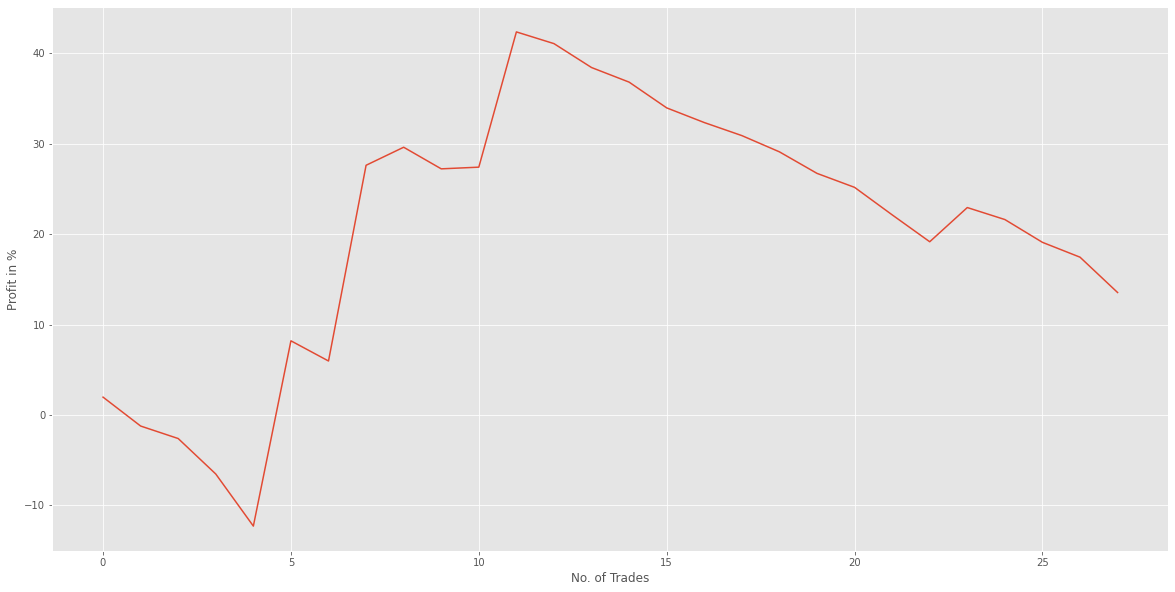

In [989]:
pnl_l1 = tradebook_df['pnl'].to_list()
plt.plot()
plt.plot(np.cumsum(pnl_l1))
plt.xlabel("No. of Trades")
plt.ylabel("Profit in %")

In [990]:
realised_pnl

13.54143699265017